DLA - Diffusion Limited Aggregation Simulation




Enter: A number
[M] : Dimension to Start with a M x M matrix 

500
 [N] :Number of particles to show DLA in the above M x M matrix
50000
Simulation done. Final Image


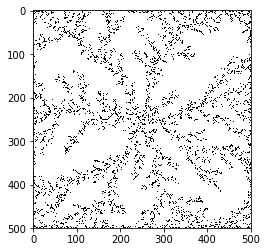

In [24]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


def LoadAtEdge(dim):  # Find a random point in randomly selected edge to start with

    upper_edge = (0,np.random.randint(dim-1))      # select a random point in upper edge
    right_edge = (np.random.randint(dim-1),dim-1)  # select a random point in right edge
    lower_edge = (dim-1,np.random.randint(dim-1))  # select a random point in lower edge
    left_edge = (np.random.randint(dim-1),0)       # select a random point in left edge

    all_edges = [upper_edge, right_edge, lower_edge, left_edge ]
    random_edge = all_edges[np.random.randint(4)]  # select the random entry point
    return random_edge

def BrownianMotion(matrix, random_edge):  # Random 2D walk untill a '1' is found in neighbouring cell
    
    play_the_game = 1
    row,col = random_edge
    old_cell = random_edge
    while play_the_game == 1:
        nearby_cells = [(row - 1, col - 1), (row - 1, col), (row - 1, col + 1), (row, col - 1),
                        (row, col + 1), (row + 1, col - 1), (row + 1, col), (row + 1, col + 1)] 
                                                                       # all the possible neighbouring cells 
        nearby_cells = list(filter(lambda cells : (cells[0] < dim and cells[0] > -1) and (cells[1] < dim and cells[1] > -1), nearby_cells))  
                                                                       # ignoring cells which would make particles bounces off the edge
        next_move = nearby_cells[np.random.randint(len(nearby_cells))] # randomly select a cell from the remaining possible cells
        row,col = next_move
        if matrix[next_move] == 1:                                     # if the next move has already one. Stop the flow and load new particle
            matrix[old_cell] = 1
            play_the_game = 0
        for cells in nearby_cells:                                     # stop the random 2D walk if particle encounters another particle in an adjacent cell
            if matrix[cells] == 1:                                     # 1 found in adjacent cell
                matrix[old_cell] = 1                                   # particle stuck here forever
                play_the_game = 0                                      # return back to load the new particle
        old_cell = next_move
        row,col = next_move
    return matrix


print ('DLA - Diffusion Limited Aggregation Simulation')
print( "\n" )
print( "\n" )
print( "Enter: A number" )
print ("[M] : Dimension to Start with a M x M matrix \n" )

user_input = input()
user_input = user_input.upper()
if user_input.isnumeric(): 
    dim = int(user_input)
    print ( " [N] :Number of particles to show DLA in the above M x M matrix" )
    user_input = input()
    if user_input.isnumeric():
        particles = int(user_input)
    else:
        text = ". Terminating program. Try Again!!"
        print( "You have entered a wrong arugument {}{}".format(user_input, 'for particles' ))
        exit()
        
else:
    text = ". Terminating program. Try Again!!"
    print( "You have entered a wrong arugument {}{}".format(user_input, ' size of matrix' ))
    exit()


def DLAsimulation():  
                                                                # start the DLA simulation
    matrix = np.zeros((dim, dim), dtype = int)                  # create the empty matrix
    matrix[(int(dim/2 -1)), (int(dim/2 -1))] = 1                # set the center to 1
    i = 0
    while i < particles:                                        # loop for number of particles
        i+= 1
        random_edge = LoadAtEdge(int(dim))
        j = 0
        while j < 10:                                           # Just a try to start with a random edge which is not already 1  
            j = j + 1
            if matrix[random_edge] == 1:                        # try 10 times to select a random edge in case it's already 1
                random_edge = LoadAtEdge(dim)
            else:
                j = 10
        #matrix[random_edge] = 1   # set the random point to 1 just to show the start
        #plt.imshow(1 - matrix, 'gray')  #show the start of the journey (1- matrix would reverse the matrix for visual purpose)
        #plt.show()
        #matrix = np.zeros((dim, dim), dtype = int)
        #matrix[(int(dim/2 -1)), (int(dim/2 -1))] = 1  # back to normal state
    
        matrix = BrownianMotion(matrix, random_edge)
    print('Simulation done. Final Image')
    plt.imshow(1- matrix,'gray')

DLAsimulation()